# Relationship between Features of Wine and Quality Rating

### Introduction

Red wine has specific attributes (acidity, sugar, alcohol, etc.) that determine its taste and perceived quality. The quality of red wine is often evaluated by professional sommeliers, a time-consuming and subjective assessment process. Attributes of red wine and its quality rating have been determined and collected into a data set that is donated to the UCI machine learning repository.

This project will take that data and attempt to answer the question:
*What attributes of wine affect wine quality and how?*

For relevant documentation and details of data set, reference [documentation](https://doi.org/10.1016/j.dss.2009.05.016).

The following are the potential predictor variables including their units:

|Variable|Units|
|--|--|
|Fixed acidity|g<sub>(tartaric acid)</sub>/dm<sup>3</sup>|
|Volatile acidity|g<sub>(acetic acid)</sub>/dm<sup>3</sup>|
|Citric acid|g/dm<sup>3</sup>|
|Residual sugar|g/dm<sup>3</sup>|
|Chlorides|g<sub>(sodium chloride)</sub>/dm<sup>3</sup>|
|Free sulfur dioxide|mg/dm<sup>3</sup>
|Total sulfur dioxide|mg/dm<sup>3</sup>|
|Density|g/cm<sup>3</sup>
|pH|0-14 pH scale|
|Sulphates|g<sub>(potassium sulphate)</sub>/dm<sup>3</sup>|
|Alcohol|vol. %|
|Quality|0-10 scale|

### Methods and Results - Jack will add his code and Richard and Jason can edit this

## Methods

Methods will include the [*Preliminary exploratory data analysis*](#pre_data_analysis) and the [*Data analysis*](#data_analysis) section

blah blah blah picking predictors blah blah below is the code

### Preliminary exploratory data analysis
<a id='pre_data_analysis'></a>
##### The preliminary exploratory data analysis will include:
- Reading dataset from web link
- Cleaning and wrangling data into a tidy format
- Splitting into training data and test data
- Summary statistics of training subset
- Visualizing training data comparing distributions of predictor variables

In [1]:
# load necessary libraries
library(tidyverse)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Reading from web link
Read from link with appropriate delimiter.

In [2]:
# read data frame from UCI machine learning database
red_wine_link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# use ';' delimiter, read_csv2 will not work as '.' is used as decimal points
red_wine_data <- read_delim(red_wine_link, ';')

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Cleaning and Wrangling
After the data is read, the variable names are renamed to appropriate names

Additionally, the quality variable is converted to a factor type, as it is a discrete variable.

In [3]:
# rename column names for easier reference
colnames(red_wine_data) <- c("fixed_acidity", "volatile_acidity", "citric_acid", 
                             "residual_sugar", "chlorides", "free_so2", "total_so2",
                             "density", "ph", "sulphates", "alcohol", "quality")

# convert quality to factor type
red_wine_data <- mutate(red_wine_data, quality = as_factor(quality))

head(red_wine_data)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,ph,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


#### Splitting
Splitting the data involves some form of randomness, thus a seed is set for consistency.

The data is split with `SPLIT_PROPORTION` and strata `quality`.

In [4]:
# set seed for consistency
set.seed(8888)

# splitting data set into training and testing subsets
SPLIT_PROPORTION = 0.75
red_split_data <- initial_split(red_wine_data, prop = SPLIT_PROPORTION, strata = quality)

red_training_data <- training(red_split_data)
red_testing_data <- testing(red_split_data)

# count the number of observations in each subset
paste("Number of observations in training data subset: ", pull(count(red_training_data)))
paste("Number of observations in testing data subset: ", pull(count(red_testing_data)))

[1] "Number of observations in training data subset:  1198"

[1] "Number of observations in testing data subset:  401"

#### Statistics of training data subset
Some statistics include number of `null` and `N/A`, and the min, mean, max, standard deviation.

<sub>Note: rules of tidy data do not apply to visual representation of statistics.</sub>

In [5]:
# check for null/na data
paste("Number of null values: ", sum(map_df(red_training_data, is.null)))
paste("Number of N/A values: ", sum(map_df(red_training_data, is.na)))

# produce summary statistics of the training data, not used as it is difficult to read
#summary(red_training_data)

# creating an abstract function for the sake of reducing repetitive code, acts as a "code template"
red_map <- function(fn) {
    red_training_data |>
    # remove quality, as it is decided to be the class variable and is now categorical
    select(-quality) |>
    # apply function from parameter into map function
    map_df(fn) |>
    # pivot for better view
    pivot_longer(cols = fixed_acidity:alcohol, values_to = as.character(substitute(fn)), names_to = "variable")
}

# example of what the function does when red_map(mean) is called
# red_training_mean <- red_training_data |>
#     select(-quality) |>
#     map_df(mean) |>
#     pivot_longer(cols = fixed_acidity:alcohol, values_to = "mean", names_to = "variable")

# bind all statistics together, but remove the variable column from all but first
bind_cols(red_map(min), select(red_map(mean), mean), select(red_map(max), max), select(red_map(sd), sd))

[1] "Number of null values:  0"

[1] "Number of N/A values:  0"

variable,min,mean,max,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
fixed_acidity,4.60000,8.34849750,15.90000,1.766492235
volatile_acidity,0.12000,0.52679048,1.58000,0.180477609
citric_acid,0.00000,0.27278798,1.00000,0.196989218
residual_sugar,0.90000,2.53914858,15.50000,1.382344494
chlorides,0.01200,0.08800751,0.61100,0.048661885
free_so2,1.00000,15.90734558,72.00000,10.408479102
total_so2,6.00000,46.32721202,289.00000,32.831144831
density,0.99007,0.99676214,1.00315,0.001865492
ph,2.74000,3.30863105,3.90000,0.151822003


As seen above, there does not appear to be any invalid values of any variable in all the observations, so further wrangling to data in this stage is not necessary.

#### Visualization of training data subset

The last part involves plots that are relevant to the objective.
The first plot is a distribution of the `quality` class variable.

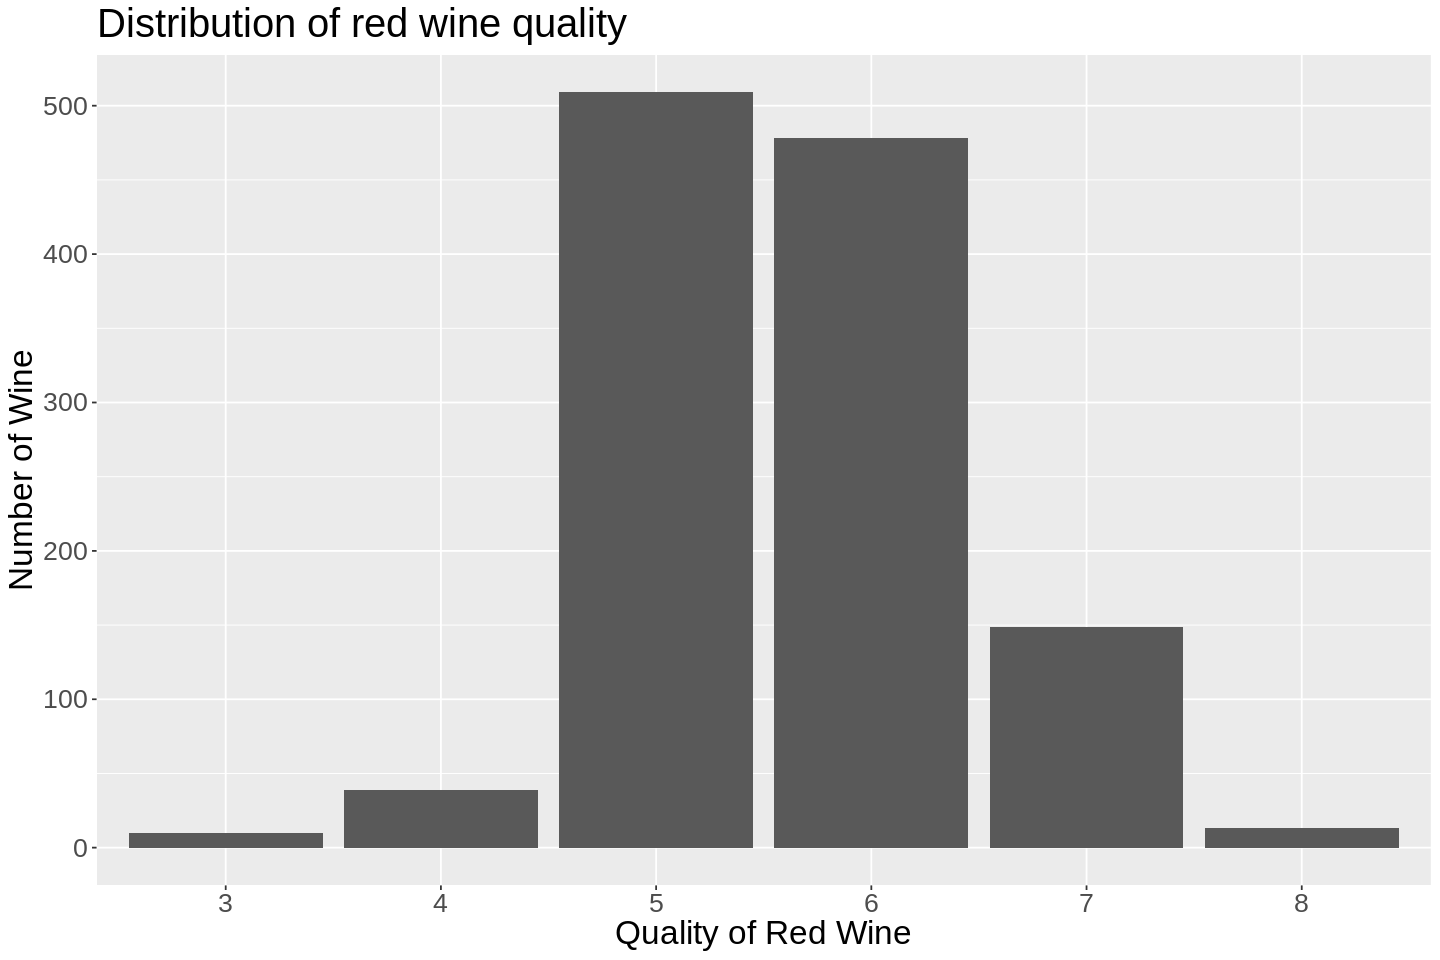

In [6]:
options(repr.plot.width = 12, repr.plot.height = 8)

#plotting the distribution of red wine quality
red_quality_bar <- ggplot(red_training_data, aes(x = quality)) +
    geom_bar() +
    labs(x = "Quality of Red Wine", y = "Number of Wine") + 
    ggtitle("Distribution of red wine quality") +
    theme(text = element_text(size = 20))

red_quality_bar

From the plot above, it can be seen that the `quality` variable is somewhat normally distributed with the center ~5. However, it is notable that the actual range of the testing data is from 3 to 8, despite the documentation noting it is on the scale from  0 to 10. This means that the possible results produced by models trained with this training data will have the `quality` variable range from 3 to 8.

Second plot is comparing the distribution of the potential predictor variables. The data is normalized with `scale()` and plotted as histograms with `facet_wrap()` for appropriate visual comparison. Outliers are removed to improve the visualization.

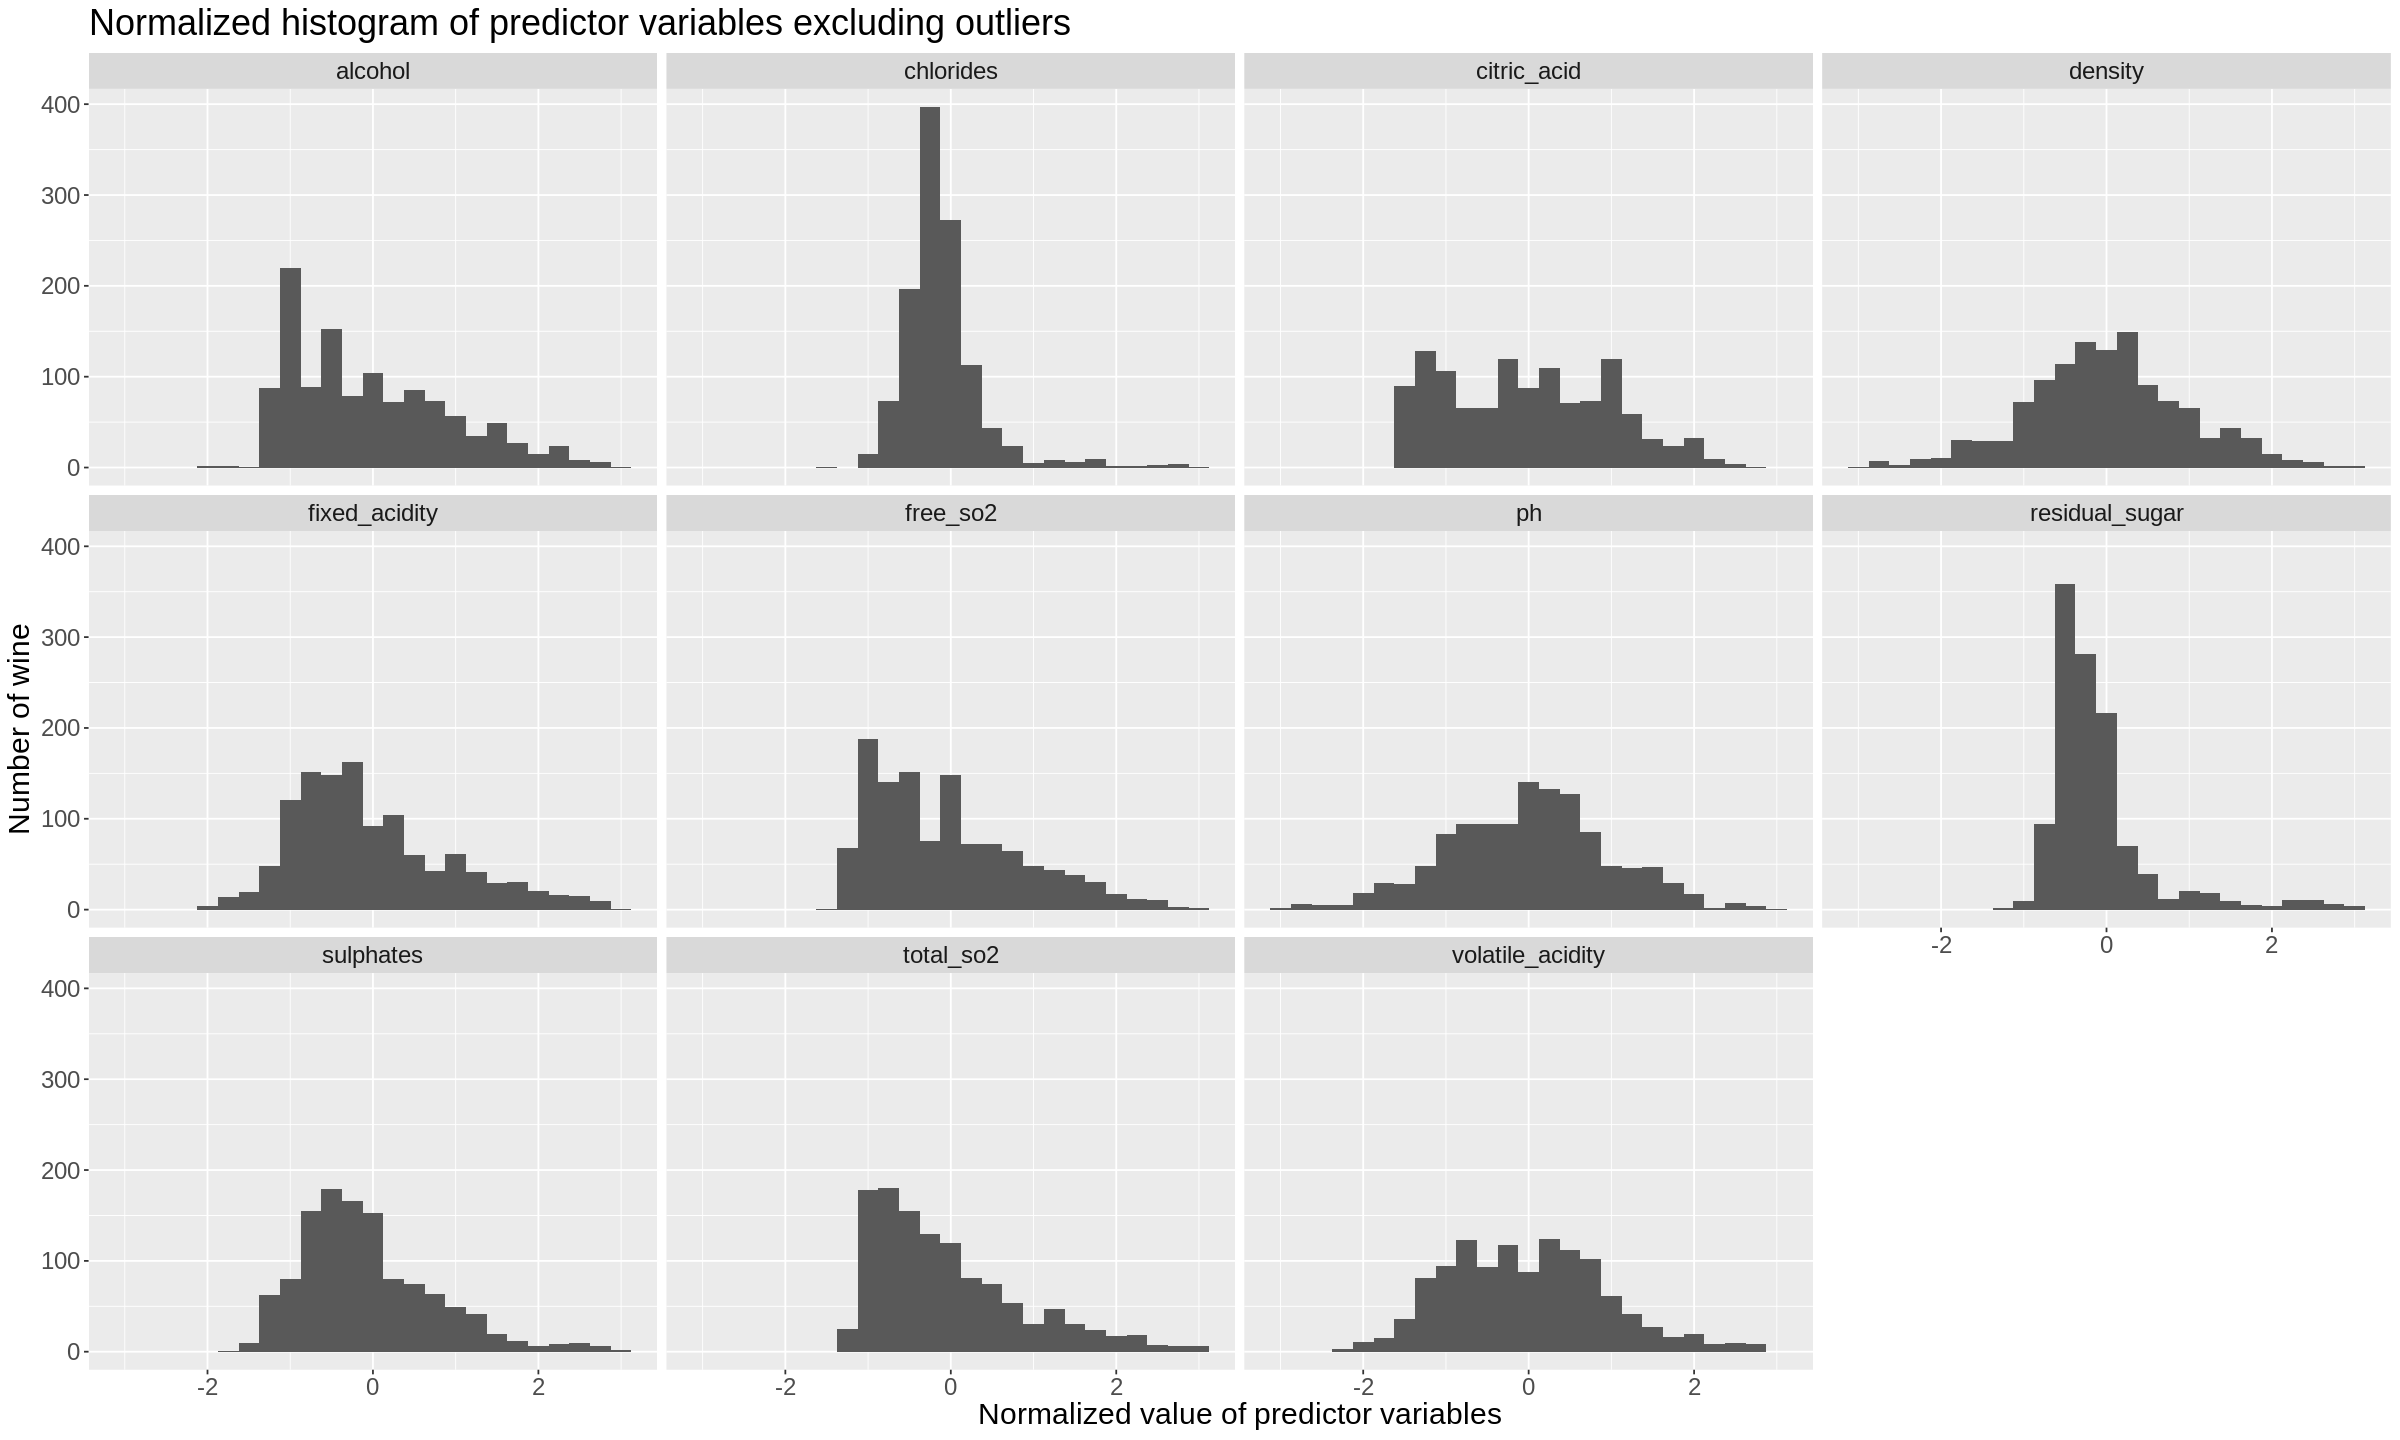

In [7]:
options(repr.plot.width = 20, repr.plot.height = 12)

#normalize the data with respect to each predictor variable
red_training_normalized <- red_training_data |>
    select(-quality) |>
    scale() |>
    as.data.frame()

red_training_normalized_longer <- pivot_longer(red_training_normalized, cols = fixed_acidity:alcohol, names_to = "variable", values_to = "value")

# define binwidth constant
PREDICTOR_BINWIDTH <- 0.25

# code to plot without excluding outliers
# red_predictor_histogram <- ggplot(red_training_normalized_longer, aes(x = value)) + 
#     geom_histogram(binwidth = PREDICTOR_BINWIDTH) +
#     facet_grid(rows = vars(variable)) +
#     ggtitle("Normalized histogram of predictor variables") +
#     labs(x = "Normalized value of predictor variables", y = "Number of wine") + 
#     theme(text = element_text(size = 18))

# remove outliers that are outside of 3 standard deviations
red_training_normalized_longer_eo <- filter(red_training_normalized_longer, value < 3 & value > -3)

red_predictor_histogram_eo <- ggplot(red_training_normalized_longer_eo, aes(x = value)) + 
    geom_histogram(binwidth = PREDICTOR_BINWIDTH) +
    facet_wrap(vars(variable)) +
    ggtitle("Normalized histogram of predictor variables excluding outliers") +
    labs(x = "Normalized value of predictor variables", y = "Number of wine") + 
    theme(text = element_text(size = 18))

red_predictor_histogram_eo

From the second plot, it can be seen that some of the predictor variable distributions tend to be positively skewed and some distributions are taller than others.

The third plot will involve `ggpairs()` from the `GGally` extension of `ggplot2`, which creates a scatter plot matrix with correlation coefficients that allows visualizations of relationships between predictor variables. For this visualization, `quality` is converted back to double type for the sake of the correlation coefficient, which is used for analysis in the plots below.

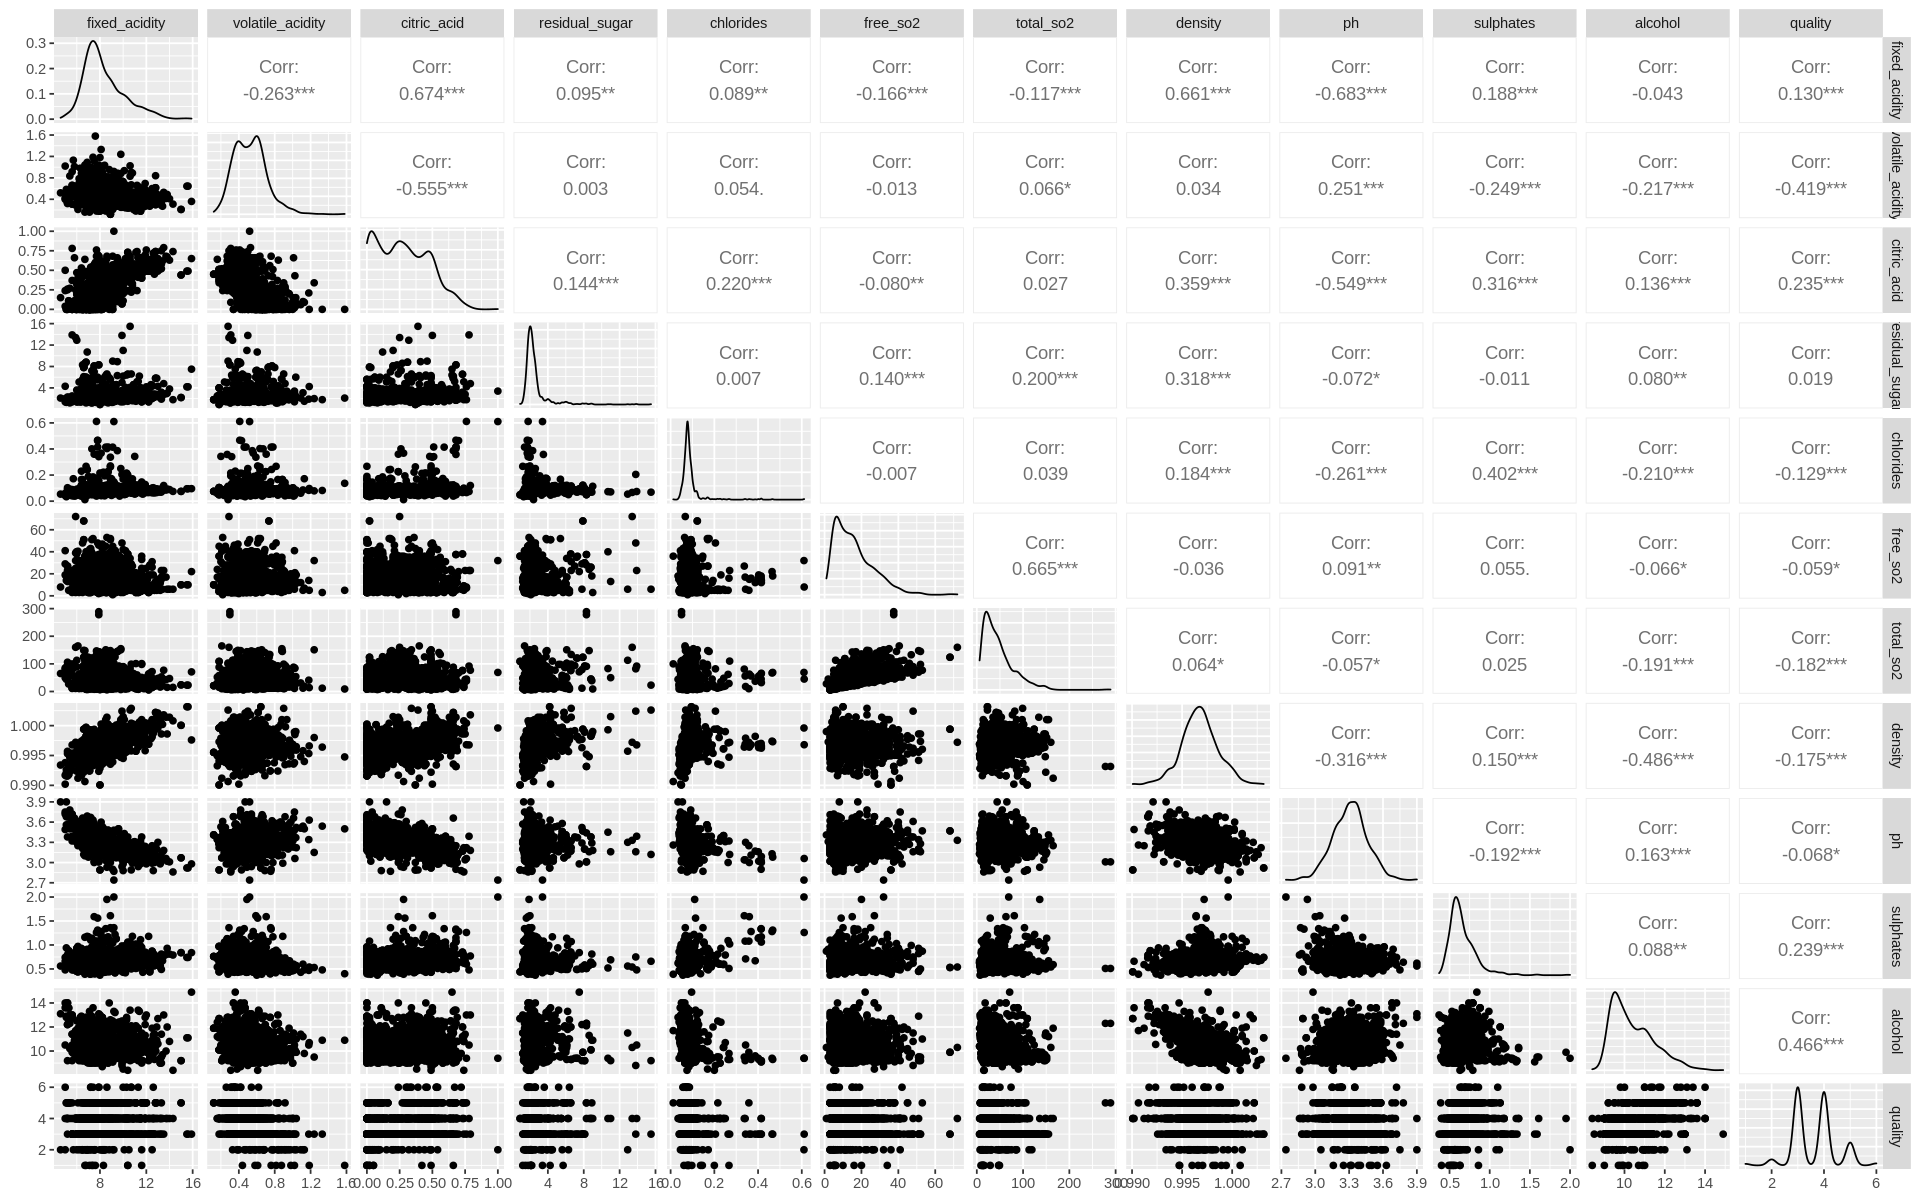

In [8]:
options(repr.plot.width = 16, repr.plot.height = 10)
red_training_data |> 
    mutate(quality = as.double(quality)) |>
    ggpairs()

# Summary of Correlation Between Wine Quality and Attribute:
## Positive Correlation (Weakest-Strongest)

Residual sugar: 0.019

Fixed acidity: 0.13

Citric acid: 0.235

Sulphates: 0.239

Alcohol: 0.466

## Negative Correlation (Weakest-Strongest)
Free SO2: -0.059

pH: -0.068

Chlorides: -0.129

Density: -0.175

Total SO2: -0.182

Volatile acidity: -0.419

From the plot above, the correlation coefficient between variables can be seen along with the scatterplot.

Below is an example scatter plot to explore the two predictor variables that have relatively highest correlation with each other (density vs. fixed acidity), used for axes, and the class variable, as the color. The data used is not normalized.

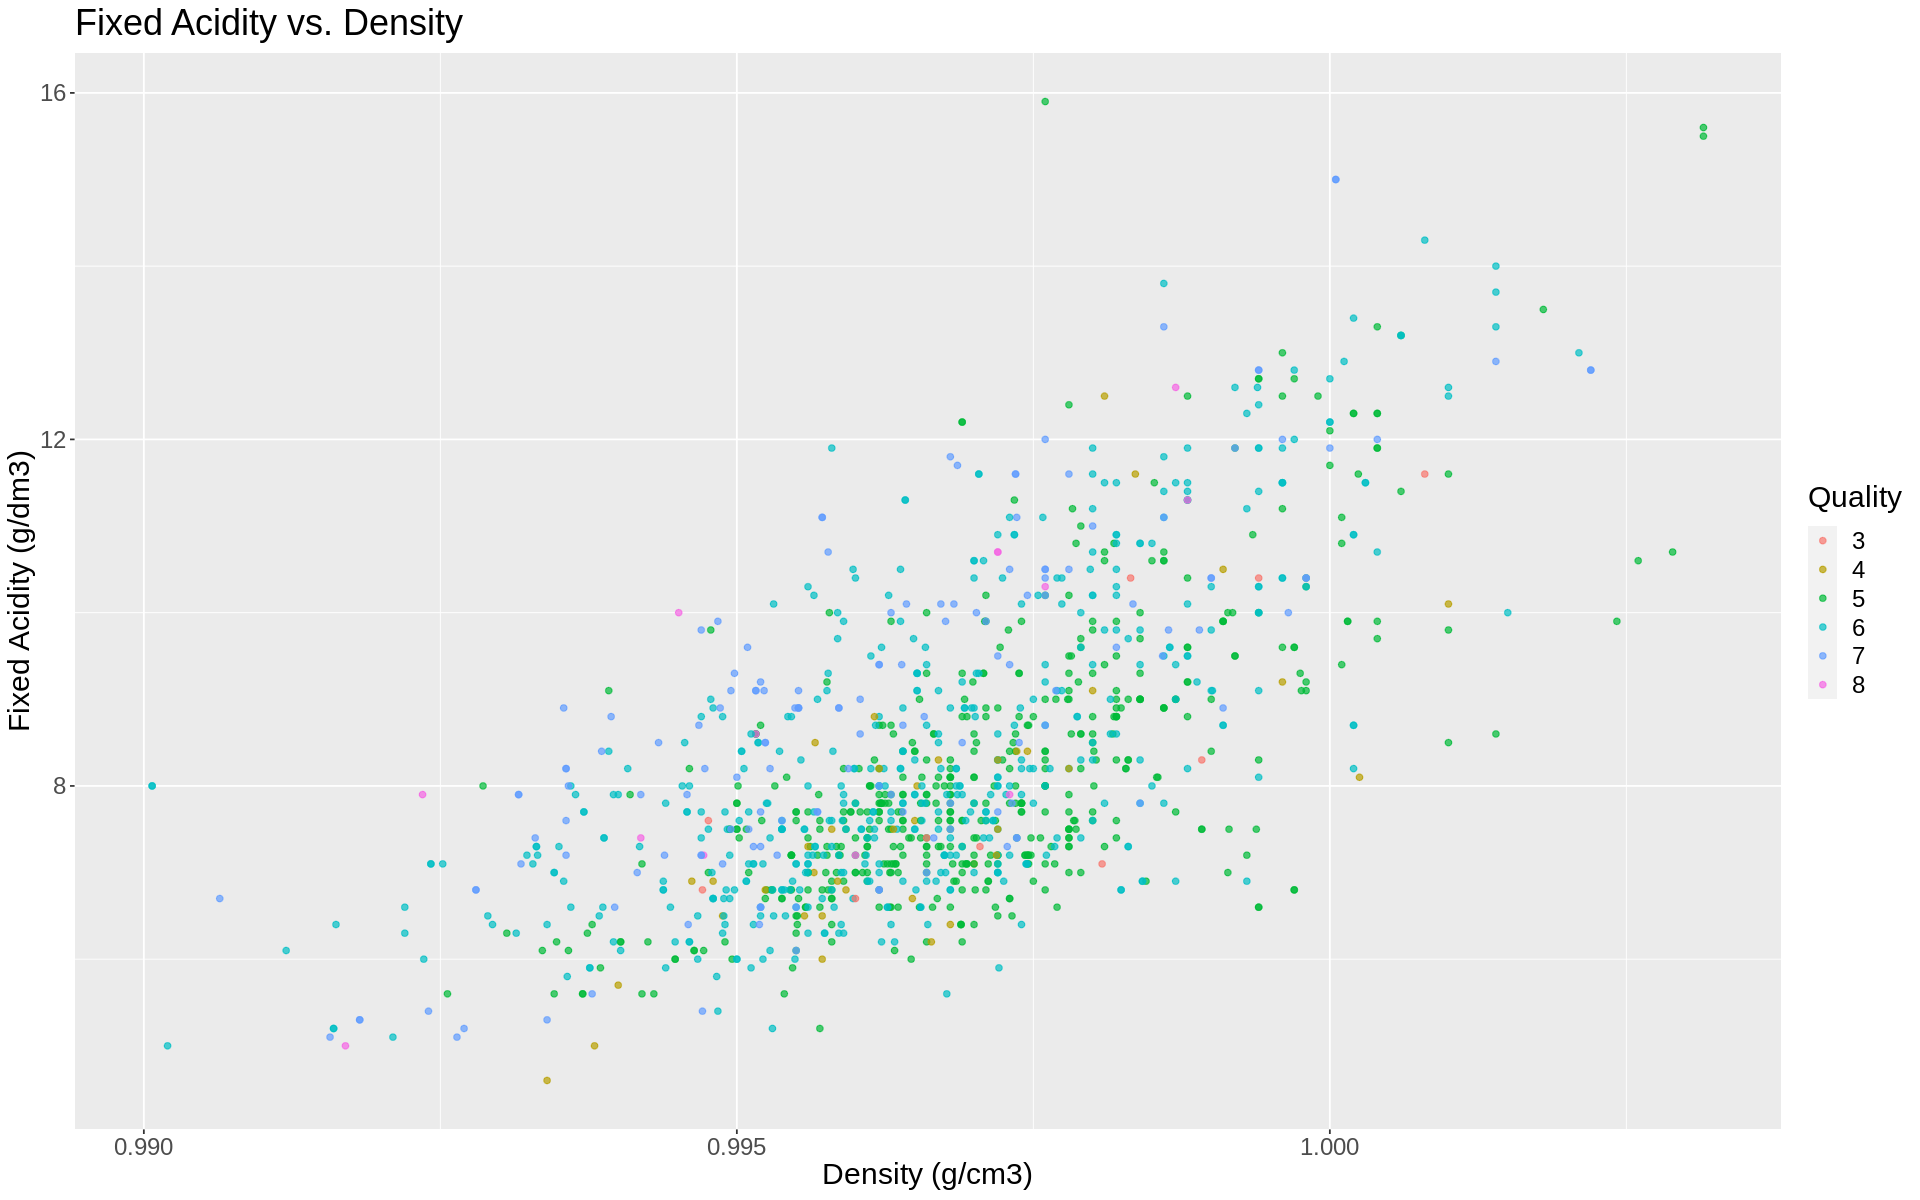

In [10]:
options(repr.plot.width = 16, repr.plot.height = 10)

red_density_fixed_acidity_scatter <- ggplot(red_training_data, aes(x = density, y = fixed_acidity, color = quality)) + 
    geom_point(alpha = 0.7) +
    ggtitle("Fixed Acidity vs. Density") +
    labs(x = "Density (g/cm3)", y = "Fixed Acidity (g/dm3)", color = "Quality") + 
    theme(text = element_text(size = 18))

red_density_fixed_acidity_scatter

With this example, it can be seen that the higher quality wine tend to have higher fixed acidity and lower density, appearing to be in the upper left of the scatter points.

The next scatter plot is exploring the two predictor variables that have the highest R<sup>2</sup> or highest correlation magnitude with the quality, which are volatile acidity and alcohol.

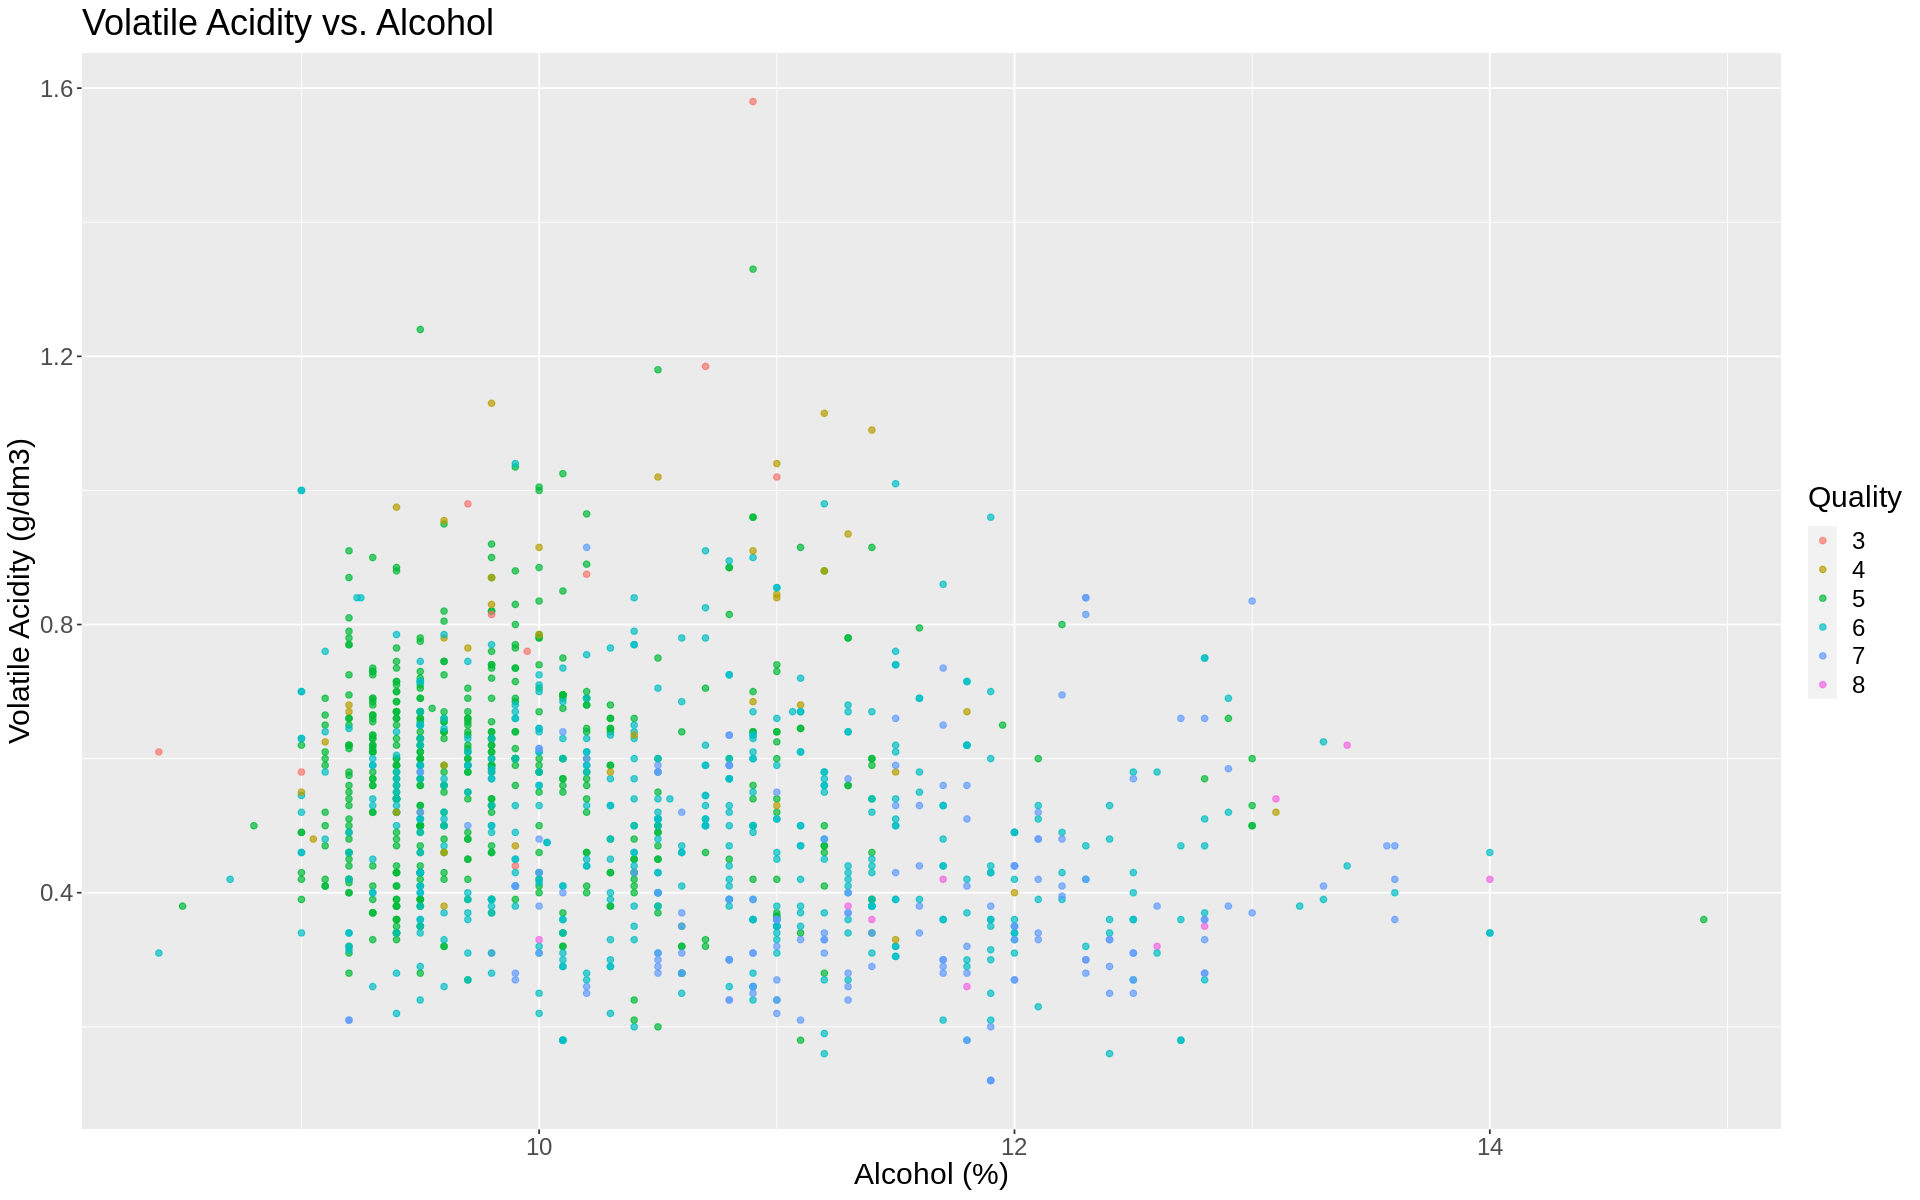

In [11]:
red_volatile_acidity_alcohol_scatter <- ggplot(red_training_data, aes(x = alcohol, y = volatile_acidity, color = quality)) + 
    geom_point(alpha = 0.7) +
    ggtitle("Volatile Acidity vs. Alcohol") +
    labs(x = "Alcohol (%)", y = "Volatile Acidity (g/dm3)", color = "Quality") + 
    theme(text = element_text(size = 18))

red_volatile_acidity_alcohol_scatter

This plot reveals that higher quality wine tends to have higher alcohol content and lower volatile acidity levels.

With the two scatter plots above, relationships between the predictor variables are revealed and can be further explored; we can plot volatile acidity with fixed acidity and determine whether higher quality wine tend to have lower volatile acidity but higher fixed acidity.

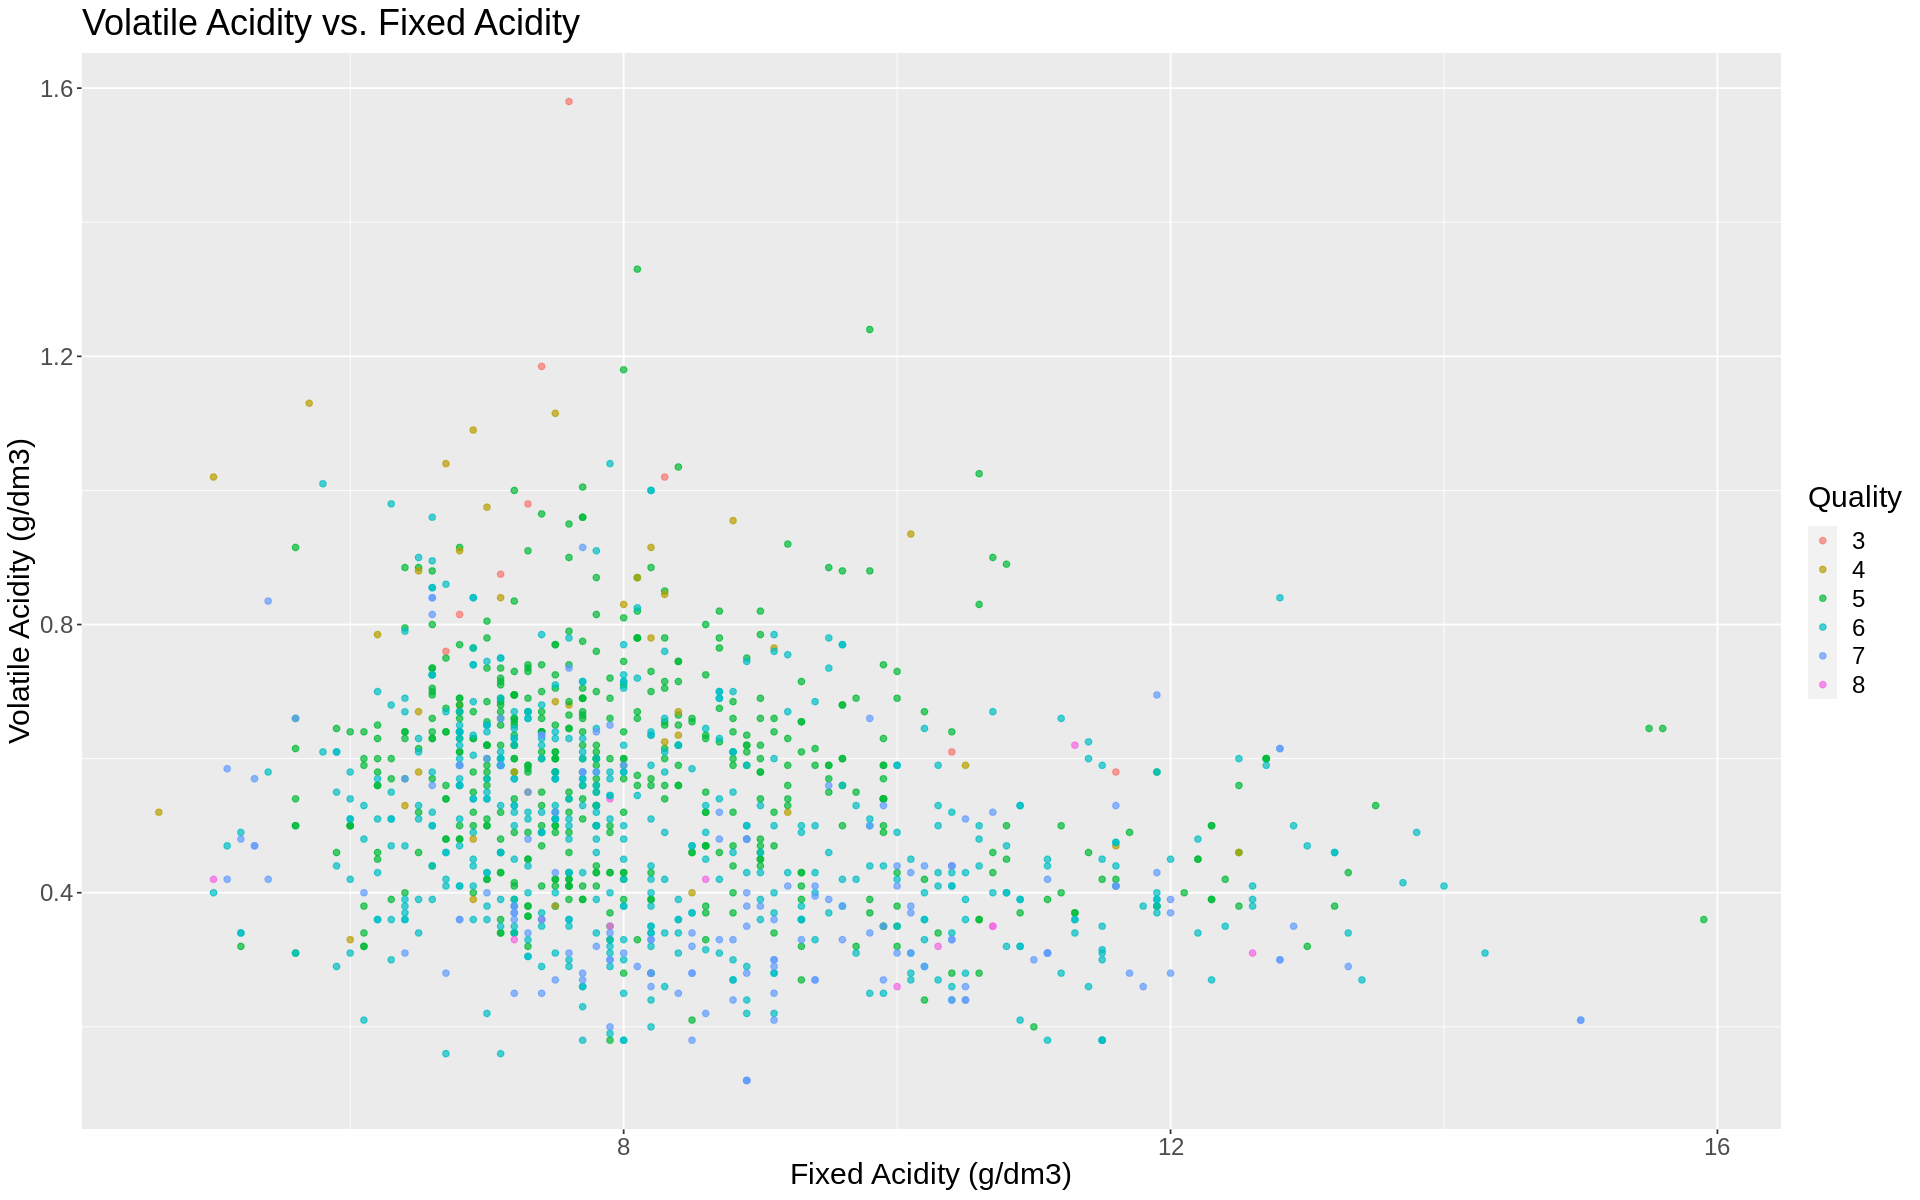

In [12]:
red_volatile_fixed_acidity_scatter <- ggplot(red_training_data, aes(x = fixed_acidity, y = volatile_acidity, color = quality)) + 
    geom_point(alpha = 0.7) +
    ggtitle("Volatile Acidity vs. Fixed Acidity") +
    labs(x = "Fixed Acidity (g/dm3)", y = "Volatile Acidity (g/dm3)", color = "Quality") + 
    theme(text = element_text(size = 18))

red_volatile_fixed_acidity_scatter

### Data analysis
<a id='data_analysis'></a>

something something here begins the actual data analysis using ... predictor variables

## Discussion - come back to this

jack's sentence: "conventionally, strong correlations tend to be between 0.8-1.0, but with the given correlations from ggplot, we can only determine 'strong correlations' relatively"

### References: 
1. https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377

2. insert link

3. https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv